In [75]:
# data analysis and wrangling

import pandas as pd
import numpy as np


# visualization
import matplotlib.pyplot as plt
import seaborn as sn

import warnings 
warnings.filterwarnings('ignore')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [7]:
df.dtypes

# catagorical- survived,sex and embarked
# ordinal-pclass
# numerical-continuos-Age,Fare & discrete-Sibsp and parch

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# in dataset-mixed data types-ticket is mix of numeric and alphanumeric and cabin is alphanumeric
# error or typos- name feature contians errors or typos


In [10]:
# cabin,Age and Embarked contains null values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lahoud, Mr. Sarkis",male,347082,G6,S
freq,1,577,7,4,644


<AxesSubplot:xlabel='Survived', ylabel='count'>

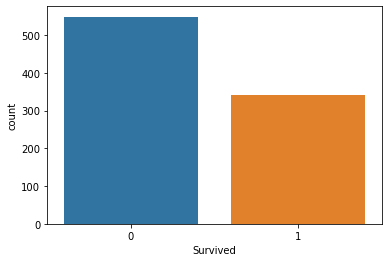

In [15]:
sn.countplot(df['Survived'])

In [16]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
cor=df.corr()

In [18]:
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

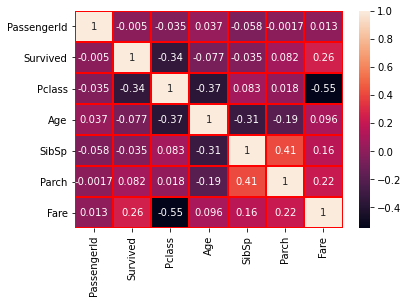

In [19]:
sn.heatmap(cor,annot=True,linewidth=1,linecolor='red')

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

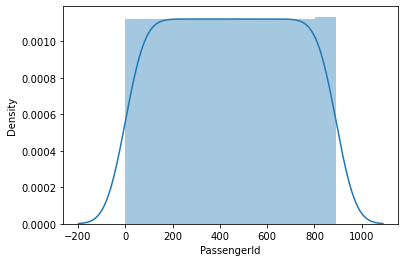

In [20]:
sn.distplot(df['PassengerId'])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

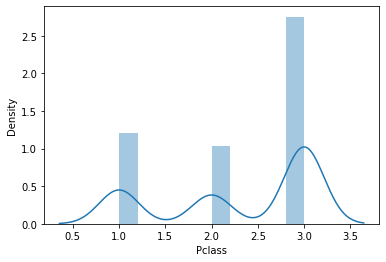

In [21]:
sn.distplot(df['Pclass'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

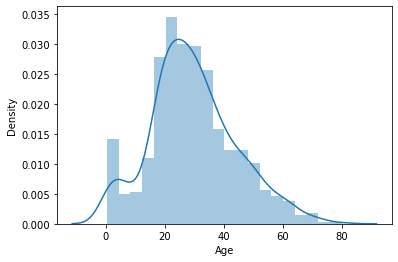

In [22]:
sn.distplot(df['Age'])

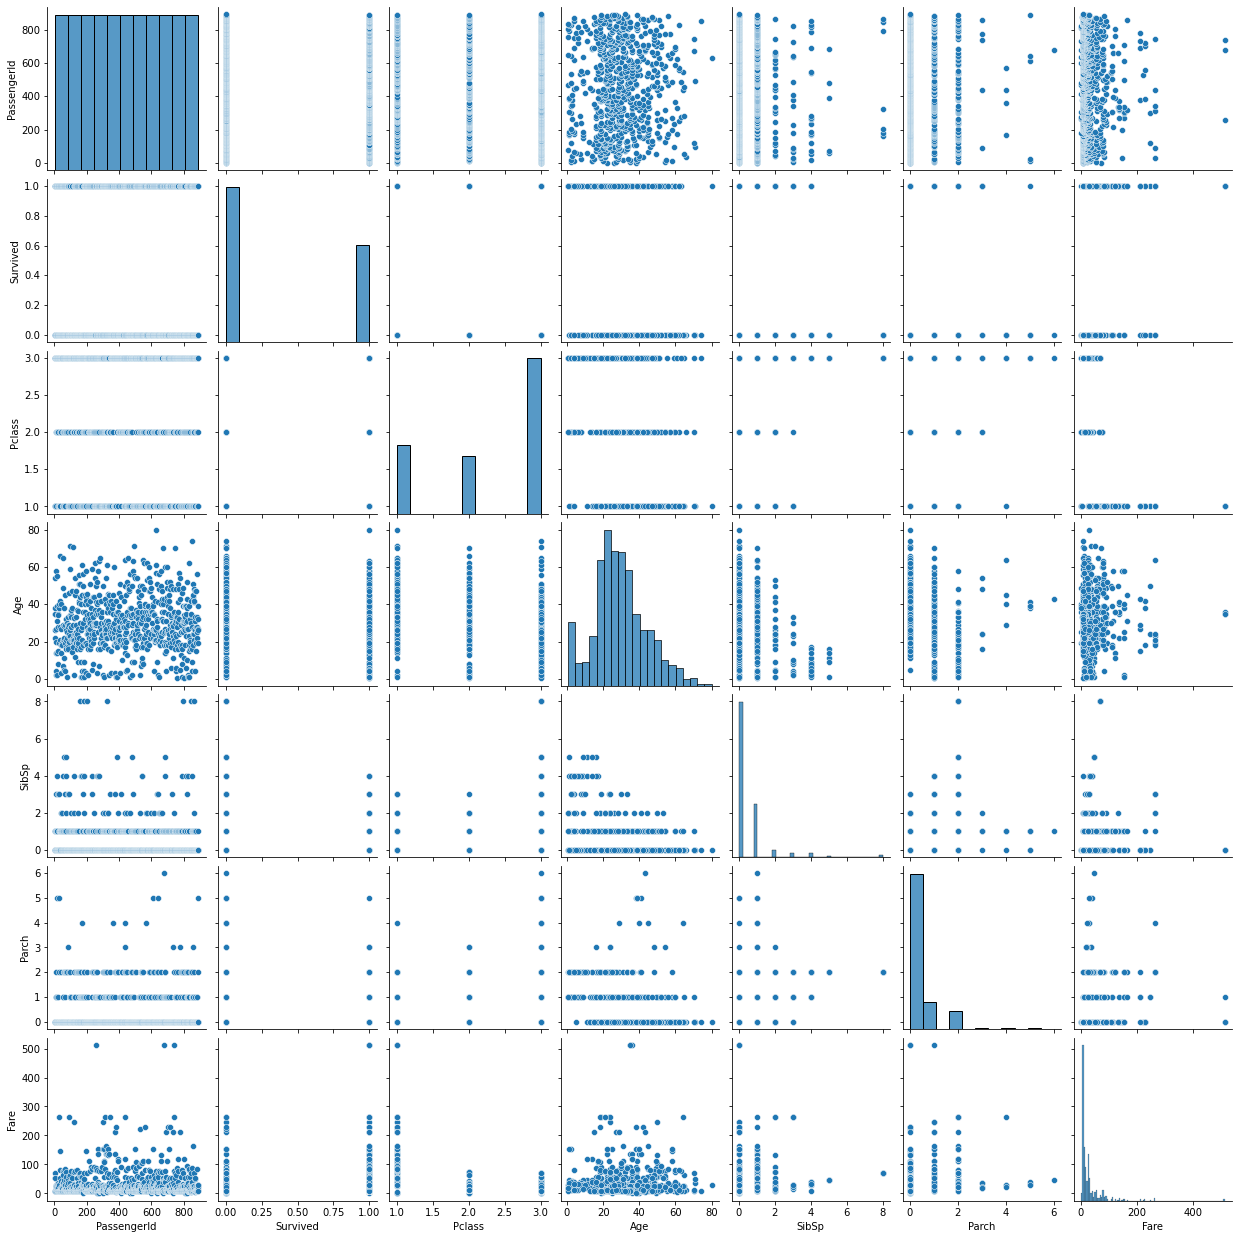

In [23]:
sn.pairplot(df)

<AxesSubplot:xlabel='PassengerId'>

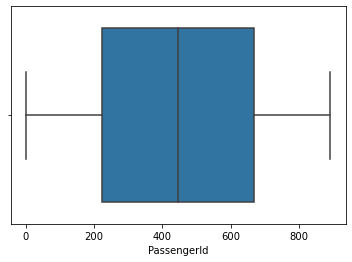

In [24]:
sn.boxplot(df['PassengerId'])

<AxesSubplot:xlabel='Pclass'>

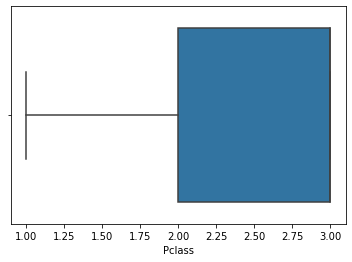

In [25]:
sn.boxplot(df['Pclass'])

<AxesSubplot:xlabel='Age'>

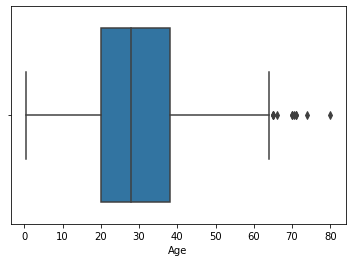

In [26]:
sn.boxplot(df['Age'])

<AxesSubplot:xlabel='SibSp'>

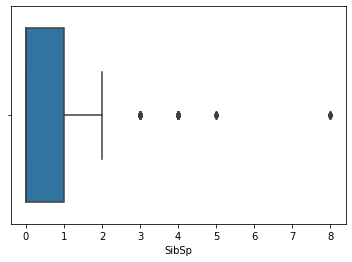

In [27]:
sn.boxplot(df['SibSp'])

<AxesSubplot:xlabel='Parch'>

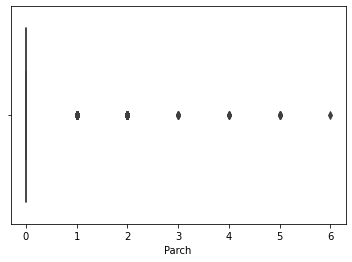

In [28]:
sn.boxplot(df['Parch'])

<AxesSubplot:xlabel='Fare'>

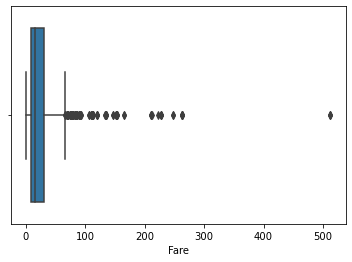

In [29]:
sn.boxplot(df['Fare'])

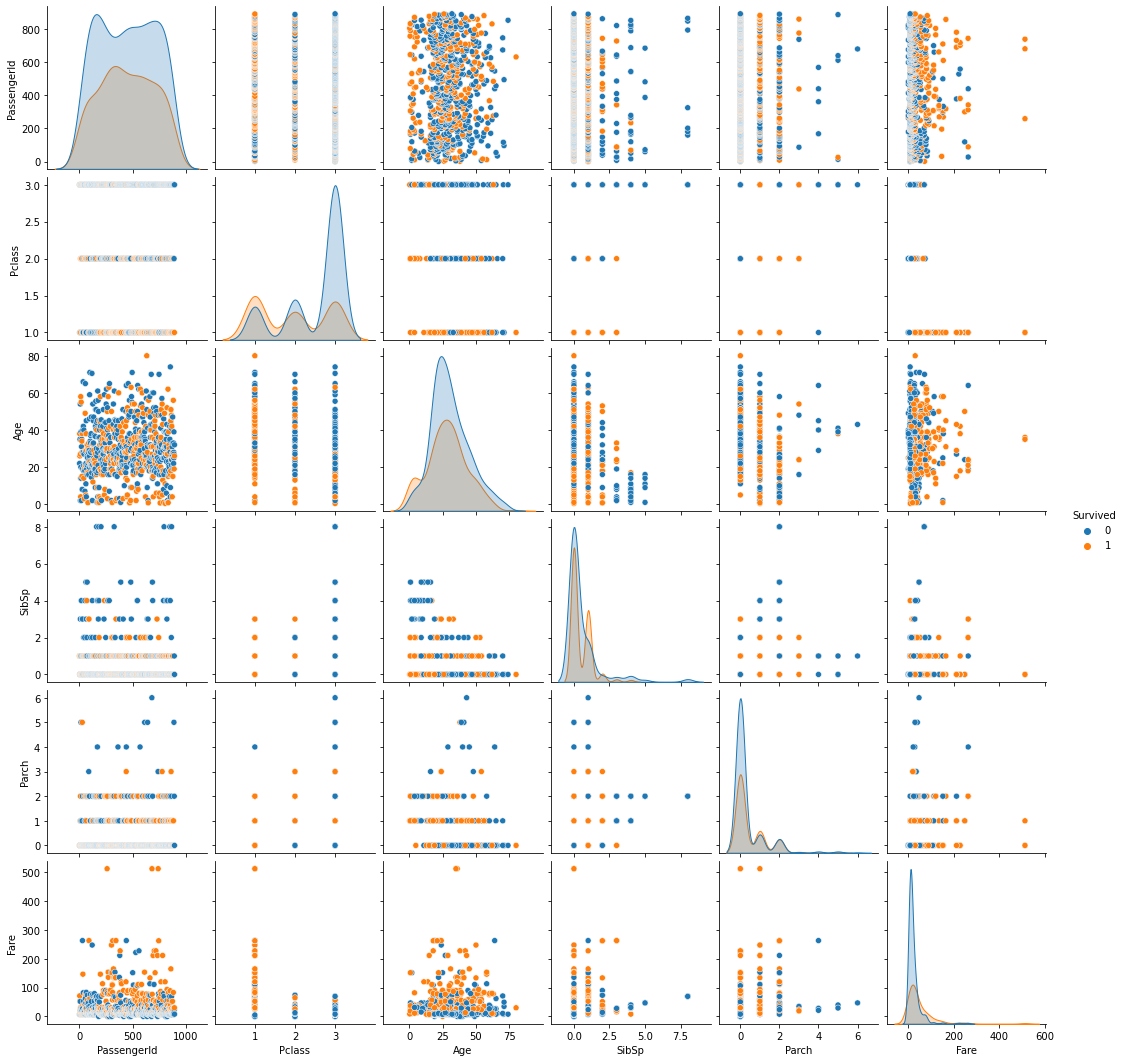

In [30]:
#Multivariate Analysis

sn.pairplot(df,hue='Survived')

In [31]:
# correcting by dropping ticket and cabin features

df=df.drop('Ticket',axis=1)
df=df.drop('Cabin',axis=1)

In [32]:
df.shape

(891, 10)

In [38]:

df=df.drop('Name',axis=1)
df=df.drop('PassengerId',axis=1)


In [39]:
df.shape

(891, 8)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
# to convert catagorical feature Sex

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[["Sex"]]=LE.fit_transform(df[["Sex"]])


In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [47]:
# to manage missing value
# to manage catagorical feature Embarked which has two missing values,replaced with S more frequent occuring
 

In [45]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [46]:
freq_port=df.Embarked.dropna().mode()[0]
freq_port

'S'

In [48]:
df['Embarked']=df['Embarked'].fillna(freq_port)

In [49]:
df[["Embarked"]]=LE.fit_transform(df[["Embarked"]])

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [51]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [53]:
# Model building and training

x=df.drop('Survived',axis=1)
y=df['Survived']

In [54]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [55]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [58]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("best accuracy is",maxAccu,"on random_state",maxRs)

best accuracy is 0.8283582089552238 on random_state 5


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=5)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [61]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8246268656716418


In [62]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8208955223880597


In [63]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.667910447761194


In [64]:
# Cross Validation 

from sklearn.model_selection import cross_val_score


In [65]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7834285355596009


In [66]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.822666499278137


In [67]:
print(cross_val_score(sv,x,y,cv=5).mean())

0.674615529470843


In [68]:
# Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV

In [69]:
#RandomForestClassifier

parameters={'n_estimators':[100],
           'max_features':['auto','sqrt'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [70]:
GCV_RF=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV_RF.fit(x_train,y_train)
GCV_RF.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [71]:
RF_mod=RandomForestClassifier(criterion='entropy',max_depth=5,max_features='sqrt',n_estimators=100)
RF_mod.fit(x_train,y_train)
pred=RF_mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.83582089552239


In [72]:
#SVC parameters hyper tuning

parameters={'C':[0.1,1,10,100,500],
           'kernel':['poly','rbf','sigmoid']
           }

In [73]:
GCV_SVC=GridSearchCV(SVC(),parameters,cv=5)
GCV_SVC.fit(x_train,y_train)
GCV_SVC.best_params_

{'C': 500, 'kernel': 'rbf'}

In [76]:
SVC_mod=SVC(C=500,kernel='rbf')
SVC_mod.fit(x_train,y_train)
pred=SVC_mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.46268656716418


In [77]:
# Saving The Model

import joblib
joblib.dump(RF_mod,"Titanicmodel.pkl")

['Titanicmodel.pkl']

In [78]:
# Conclusion- Found RandomForest is with higher efficiency